In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from sklearn import metrics
import numpy as np
import pandas as pd

**3. ¿Podemos predecir un sitio web (su categoría), a partir de una huella digital, es decir sus características?**
* elegir características para predecir sitios web / categorías
* **logistic regression** *(clase anterior)* porque tenemos respuestas categóricas (Y)
* evaluación orientada en la sesión 9

In [3]:
date = "1112"
df_flows = utils.get_flow_df(date)
df_flows_simple = utils.get_flow_df_simple(date)
df_packets = utils.get_packet_df(date)
df_packets_simple = utils.get_packet_df_simple(date)
df_flows

,Unnamed: 0,t,ID,category,tri_category,domain,avg_read_bytes,total_read_bytes,max_read_burst_len,read_bytes_list,iat_list,avg_iat
0,0,2023-11-12 14:14:54,2023-11-12 14:14:54USAS7922,GRP,TEXT,staticxx.facebook.com,810.500000,3242,4,"[517, 875, 1392, 458]","[0.0, 0.0, 0.0]",0.000000
1,1,2023-11-12 14:16:29,2023-11-12 14:16:29USAS701,GRP,TEXT,www.facebook.com,1081.000000,3243,3,"[576, 1349, 1318]","[0.005797291000000038, 0.0001362499999999489]",0.002967
2,2,2023-11-12 14:16:30,2023-11-12 14:16:30USAS701,GRP,TEXT,twitter.com,1556.888889,14012,3,"[576, 772, 2155, 576, 2927, 576, 2927, 576, 2927]","[0.0012203130000000284, 0.0008991139999999787,...",0.012304
3,4,2023-11-12 14:16:34,2023-11-12 14:16:34USAS41378,GRP,TEXT,twitter.com,1750.500000,7002,2,"[576, 2925, 576, 2925]","[0.0024838019999999794, -0.00220614600000002, ...",0.000779
4,5,2023-11-12 14:16:54,2023-11-12 14:16:54USAS41378,MMED,MMED,www.instagram.com,1166.666667,7000,3,"[576, 1349, 1575, 576, 1349, 1575]","[0.0009055729999989381, 7.531299999996577e-05,...",0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...
12121,13047,2023-11-12 08:17:20,2023-11-12 08:17:20USAS701,COMT,TEXT,telegram.org,812.000000,5684,7,"[517, 711, 1228, 1228, 412, 1228, 360]","[0.00029000000000001247, 0.0037570000000000103...",0.003450
12122,13048,2023-11-12 08:17:32,2023-11-12 08:17:32USAS701,COMT,TEXT,www.whatsapp.com,793.500000,3174,4,"[517, 863, 1380, 414]","[0.0002749999999999697, 0.0008100000000000329,...",0.001786
12123,13050,2023-11-12 08:17:53,2023-11-12 08:17:53USAS11427,GRP,TEXT,www.facebook.com,1085.000000,6510,3,"[517, 1808, 930, 517, 1808, 930]","[0.0006272920000001125, 0.001593801999999922, ...",0.052422
12124,13052,2023-11-12 08:17:55,2023-11-12 08:17:55USAS11427,GRP,TEXT,twitter.com,1751.500000,14012,2,"[517, 2986, 517, 2986, 517, 2986, 517, 2986]","[0.0006975009999999893, 0.0014217180000000162,...",0.034488


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = ["total_read_bytes", "avg_read_bytes", "avg_iat", "max_read_burst_len"]

# Separating out the features
x = df_flows_simple.loc[:, features]

# Separating out the target
y = df_flows_simple.loc[:,['domain']].values

# Standardizing the features
x_scaled = StandardScaler().fit_transform(x)
X = pd.DataFrame(x_scaled, columns = x.columns)

print(X)

       total_read_bytes  avg_read_bytes   avg_iat  max_read_burst_len
0             -0.574821       -0.749078 -0.040366           -0.118143
1             -0.377823       -0.179379 -0.003522           -0.118143
2             -0.506057        0.052398 -0.048997           -0.653036
3             -0.506094       -0.646524 -0.051508           -0.118143
4              1.843181        2.009819  0.118158           -0.653036
...                 ...             ...       ...                 ...
10123         -0.515551       -0.749677 -0.050819           -0.118143
10124         -0.506057       -0.646125 -0.030557           -0.118143
10125         -0.515058       -0.744290  0.154784           -0.118143
10126         -0.377823        0.053595  0.084017           -0.653036
10127         -0.506057       -0.646125 -0.048235           -0.118143

[10128 rows x 4 columns]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
len(x_test)

2532

In [6]:
# solver lbfgs supports multinominal 
# multi_class: strategy to deal with multiple possible response categories, uses cross-entropy loss
clf = LogisticRegression(random_state=1234, solver="lbfgs", multi_class="multinomial").fit(x_train, y_train.ravel())

predictions = clf.predict(x_test)
score = clf.score(x_test, y_test)

In [7]:
cm = metrics.confusion_matrix(y_test, predictions)
cm_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm, index=cm_labels, columns=cm_labels)
cm

array([[542,  34,  42,  12],
       [  0, 623,  10,   0],
       [  2,  62, 559,   6],
       [ 35,   9,   5, 591]])

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'twitter.com'),
  Text(0, 1.5, 'www.facebook.com'),
  Text(0, 2.5, 'www.instagram.com'),
  Text(0, 3.5, 'www.youtube.com')])

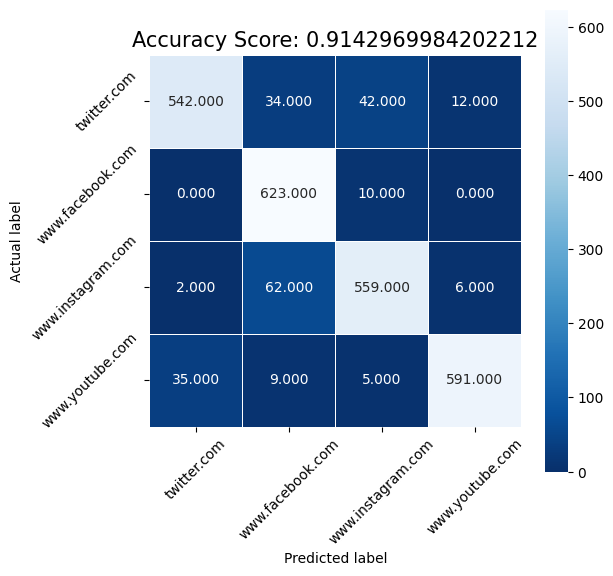

In [8]:
plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [9]:
clf.coef_

array([[-2.09776070e+00,  5.01924368e+00,  1.92676298e+00,
         4.81384932e-03],
       [ 1.00783449e+00, -8.74839800e+00, -2.57030305e+00,
         6.63599910e-01],
       [-2.16570502e+00, -9.57471381e-01, -2.32624460e+00,
         1.13581806e+00],
       [ 3.25563124e+00,  4.68662570e+00,  2.96978467e+00,
        -1.80423182e+00]])

In [10]:
# evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X, y.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.911 (0.008)


In [11]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y_train.ravel(),sm.add_constant(x_train))
result=logit_model.fit(method="lbfgs")
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38629D+00    |proj g|=  3.57006D-01

At iterate    1    f=  1.01539D+00    |proj g|=  1.07229D-01

At iterate    2    f=  9.30574D-01    |proj g|=  5.77421D-02

At iterate    3    f=  8.34611D-01    |proj g|=  4.41997D-02

At iterate    4    f=  7.68734D-01    |proj g|=  1.16869D-01

At iterate    5    f=  6.80201D-01    |proj g|=  2.25256D-02

At iterate    6    f=  6.62558D-01    |proj g|=  2.56882D-02

At iterate    7    f=  6.46336D-01    |proj g|=  1.81500D-02

At iterate    8    f=  6.35989D-01    |proj g|=  2.90096D-02

At iterate    9    f=  6.19589D-01    |proj g|=  1.80212D-02

At iterate   10    f=  6.02495D-01    |proj g|=  2.22809D-02

At iterate   11    f=  5.85241D-01    |proj g|=  1.92212D-02

At iterate   12    f=  5.75758D-01    |proj g|=  2.28458D-02

At iterate   13    f=  5.6

 This problem is unconstrained.
/home/kelmenhorst/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 7596
Model:                        MNLogit   Df Residuals:                     7581
Method:                           MLE   Df Model:                           12
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.6001
Time:                        09:30:21   Log-Likelihood:                -4210.4
converged:                      False   LL-Null:                       -10528.
Covariance Type:            nonrobust   LLR p-value:                     0.000
 y=www.facebook.com       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -7.1770      0.298    -24.071      0.000      -7.761      -6.593
total_read_bytes        4.8465      0.488      9.931      0.000       3.890       5.803
avg_read_bytes  

**Alternative model**

In [12]:
features = ["avg_read_bytes", "avg_iat"]

# Separating out the features
x = df_flows_simple.loc[:, features]

# Separating out the target
y = df_flows_simple.loc[:,['domain']].values

# Standardizing the features
x_scaled = StandardScaler().fit_transform(x)
X = pd.DataFrame(x_scaled, columns = x.columns)

print(X)

       avg_read_bytes   avg_iat
0           -0.749078 -0.040366
1           -0.179379 -0.003522
2            0.052398 -0.048997
3           -0.646524 -0.051508
4            2.009819  0.118158
...               ...       ...
10123       -0.749677 -0.050819
10124       -0.646125 -0.030557
10125       -0.744290  0.154784
10126        0.053595  0.084017
10127       -0.646125 -0.048235

[10128 rows x 2 columns]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
len(x_test)

2532

In [14]:
logit_model=sm.MNLogit(y_train.ravel(),sm.add_constant(x_train))
result=logit_model.fit(method="lbfgs")
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38629D+00    |proj g|=  3.57006D-01

At iterate    1    f=  1.07506D+00    |proj g|=  1.47353D-01

At iterate    2    f=  9.57978D-01    |proj g|=  5.59908D-02

At iterate    3    f=  8.87048D-01    |proj g|=  4.36431D-02

At iterate    4    f=  8.45293D-01    |proj g|=  1.35585D-01

At iterate    5    f=  7.52220D-01    |proj g|=  3.55684D-02

At iterate    6    f=  7.23817D-01    |proj g|=  2.29421D-02

At iterate    7    f=  7.12576D-01    |proj g|=  1.81093D-02

At iterate    8    f=  6.96772D-01    |proj g|=  2.41295D-02

At iterate    9    f=  6.86172D-01    |proj g|=  1.60122D-02

At iterate   10    f=  6.79979D-01    |proj g|=  1.67103D-02

At iterate   11    f=  6.70806D-01    |proj g|=  1.70176D-02

At iterate   12    f=  6.68128D-01    |proj g|=  9.58726D-03

At iterate   13    f=  6.6

 This problem is unconstrained.
/home/kelmenhorst/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 7596
Model:                        MNLogit   Df Residuals:                     7587
Method:                           MLE   Df Model:                            6
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.5226
Time:                        09:30:21   Log-Likelihood:                -5026.0
converged:                      False   LL-Null:                       -10528.
Covariance Type:            nonrobust   LLR p-value:                     0.000
 y=www.facebook.com       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -7.4976      0.295    -25.377      0.000      -8.077      -6.919
avg_read_bytes        -13.0218      0.424    -30.696      0.000     -13.853     -12.190
avg_iat         

In [15]:
# evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X, y.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.899 (0.009)
